In [1]:
import gym
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
env = gym.make('Blackjack-v0')

[2019-02-18 11:34:13,162] Making new env: Blackjack-v0


In [3]:
policy = 20
n_episodes = 10000
V = {(a, b, c):(0.,0.) for a in range(12, 22) for b in range(1, 11) for c in (True, False)}

def do_act(psum, policy):
    if psum >= policy:
        return 0  # stop
    else:
        return 1

for _ in range(n_episodes):
    done = False
    s = env.reset()   # player's sum, dealer's showing card, usable ace
    a = do_act(s[0], policy)
    temp_states = [s]
    temp_history = [(s, a)]
    s, r, done, info = env.step(a)
    temp_states.append(s)
    temp_history.append((s, a, r))
    while not done:
        a = do_act(s[0], policy)
        s, r, done, info = env.step(a)
        temp_states.append(s)
        temp_history.append((s, a, r))
    G = 0
    for i, ele in enumerate(reversed(temp_history)):
        if len(ele) == 2:
            s, a = ele
        else:
            s, a, r = ele
            G = G + r
        if s not in list(reversed(temp_states))[i+1:]:
            if V.get(s):
                count, incr = V[s]
                count += 1
                incr = incr + (1./(count)*(G-incr))
                V[s] = (count, incr)
            else:
                V[s] = 1, G

<IPython.core.display.Javascript object>


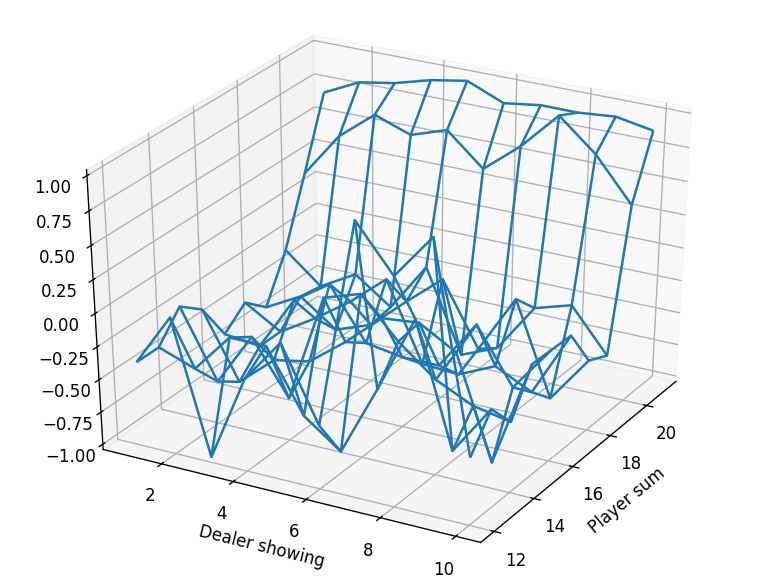

In [4]:
# Usable ace
X, Y = np.meshgrid(range(12, 22), range(1, 11))
Z = np.zeros(X.shape)

for i in range(10):
    for j in range(10):
        Z[i,j] = V[(X[i,j], Y[i,j], True)][1]   # if usable_ace: episodes[(X[i,j], Y[i,j], True)][1] 

fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim(-1, 1)
ax.invert_yaxis()
ax.plot_wireframe(X, Y, Z)
ax.set_ylabel('Dealer showing')
ax.set_xlabel('Player sum')

<IPython.core.display.Javascript object>


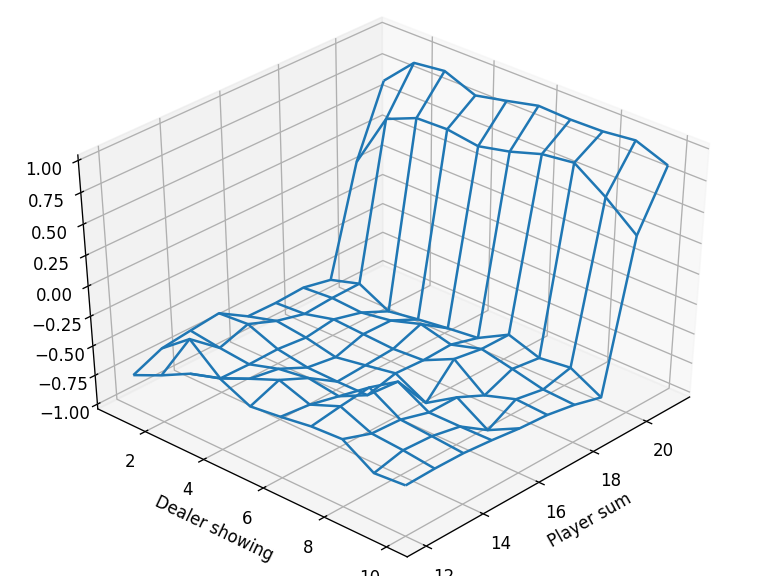

In [5]:
# No usable ace
X, Y = np.meshgrid(range(12, 22), range(1, 11))
Z = np.zeros(X.shape)

for i in range(10):
    for j in range(10):
        Z[i,j] = V[(X[i,j], Y[i,j], False)][1]   # if usable_ace: episodes[(X[i,j], Y[i,j], True)][1] 

fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim(-1, 1)
ax.invert_yaxis()
ax.plot_wireframe(X, Y, Z)
ax.set_ylabel('Dealer showing')
ax.set_xlabel('Player sum')